In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [49]:
x123 = np.array([1,10,20,40,50,70,80,90,120])
y123 = np.array([3,20,90,110,130,70,150,200,260])

In [50]:
linreg = LinearRegression()

In [51]:
x123 = x123.reshape(-1,1)

In [52]:
linreg.fit(x123,y123)

LinearRegression()

In [53]:
y_pred  = linreg.predict(x123)

In [54]:
y_pred

array([ 16.47244591,  33.34264057,  52.08730131,  89.57662279,
       108.32128352, 145.810605  , 164.55526574, 183.29992648,
       239.53390869])

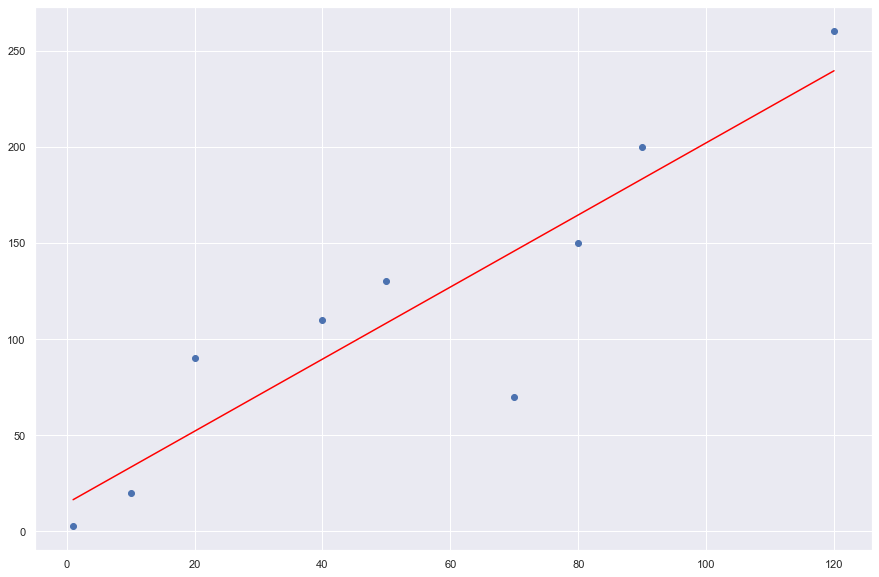

In [55]:
plt.scatter(x123, y123)
plt.plot(x123, y_pred, c="red")

In [56]:
print(linreg.coef_)

[1.87446607]


In [57]:
print(linreg.intercept_)

14.597979833344993


In [58]:
1*1.87446607 + 14.597979833344993

16.472445903344994

In [59]:
data = pd.read_csv("car_data_all_together.csv")

In [60]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data["price"], data["horsepower"])

<AxesSubplot:xlabel='price', ylabel='horsepower'>

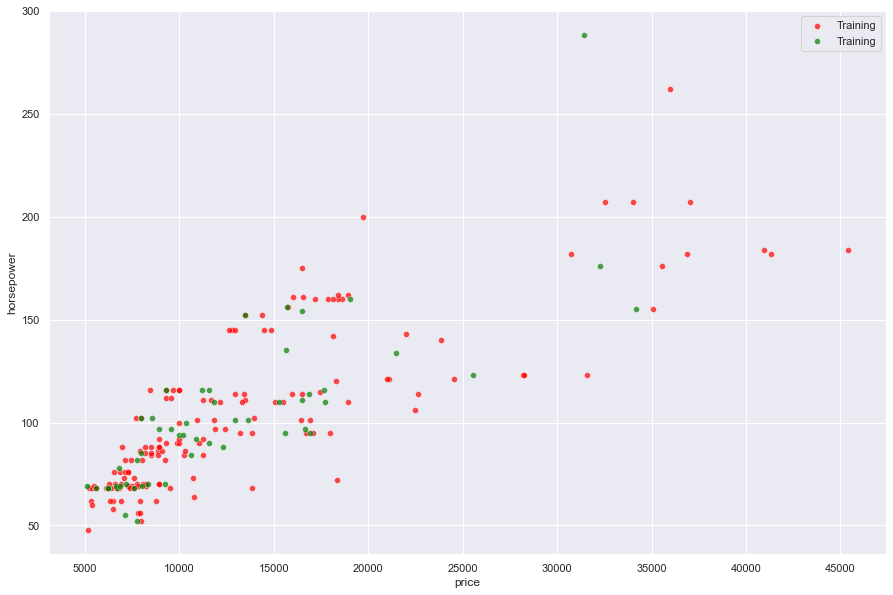

In [61]:
sns.scatterplot(x=x_train1, y=y_train1, label="Training", color="red", alpha=0.7)
sns.scatterplot(x=x_test1, y=y_test1, label="Training", color="green", alpha=0.7)

In [62]:
# Create linear model.
lr = LinearRegression()
lr.fit(x_train1.values.reshape(-1,1), y_train1.values)

LinearRegression()

In [63]:
prediction1 = lr.predict(x_test1.values.reshape(-1,1))

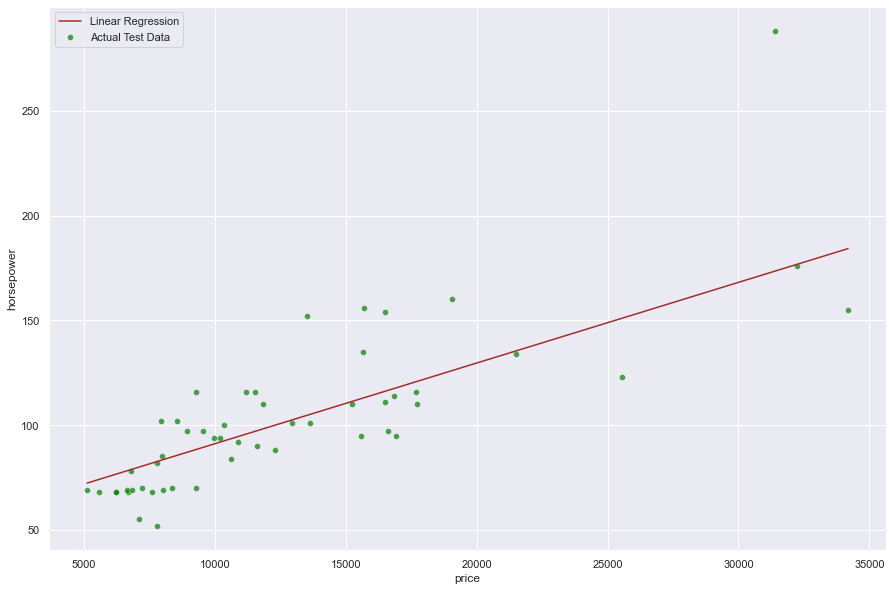

In [64]:
sns.lineplot(x=x_test1, y=prediction1, label="Linear Regression", color="brown")
sns.scatterplot(x=x_test1, y=y_test1, label="Actual Test Data", color="green", alpha=0.7)
plt.legend()
plt.show()

In [65]:
# Predict the horsepower of a car with the price of 25000.
print("The predicted horsepower of a car that costs 25000 is: ", round(lr.predict([[25000]])[0],2), "hp")

The predicted horsepower of a car that costs 25000 is:  148.9 hp


In [66]:
# Score this model.
lr.score(x_test1.values.reshape(-1,1), y_test1.values)
# The max it could get is 1.0

0.6265777428886445

In [67]:
lr.score(x_train1.values.reshape(-1,1), y_train1.values)

0.6602972331937438

In [68]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [69]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])
new_raw_data.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,fuelsystem_spfi,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_diesel,fueltype_gas
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,four,130,...,0,1,0,0,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,four,130,...,0,1,0,0,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,six,152,...,0,0,0,0,0,0,1,0,0,1
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,four,109,...,0,0,0,0,1,0,0,0,0,1
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,five,136,...,0,0,0,0,1,0,0,0,0,1


In [70]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])

new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'two'] = 2
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'three'] = 3
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'four'] = 4
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'five'] = 5
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'six'] = 6
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'eight'] = 8
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'twelve'] = 12
new_raw_data['cylindernumber'] = new_raw_data['cylindernumber'].astype(int)

warnings.simplefilter(action='ignore', category=FutureWarning)

new_raw_data.dtypes

C:\Users\krist\AppData\Local\Temp\ipykernel_17816\1262568791.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'two'] = 2
C:\Users\krist\AppData\Local\Temp\ipykernel_17816\1262568791.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'three'] = 3
C:\Users\krist\AppData\Local\Temp\ipykernel_17816\1262568791.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

car_ID                    int64
symboling                 int64
CarName                  object
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight                int64
cylindernumber            int32
enginesize                int64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower                int64
peakrpm                   int64
citympg                   int64
highwaympg                int64
price                   float64
carbody_convertible       uint8
carbody_hardtop           uint8
carbody_hatchback         uint8
carbody_sedan             uint8
carbody_wagon             uint8
aspiration_std            uint8
aspiration_turbo          uint8
doornumber_four           uint8
doornumber_two            uint8
drivewheel_4wd            uint8
drivewheel_fwd            uint8
drivewheel_rwd            uint8
enginelocation_front      uint8
enginelo

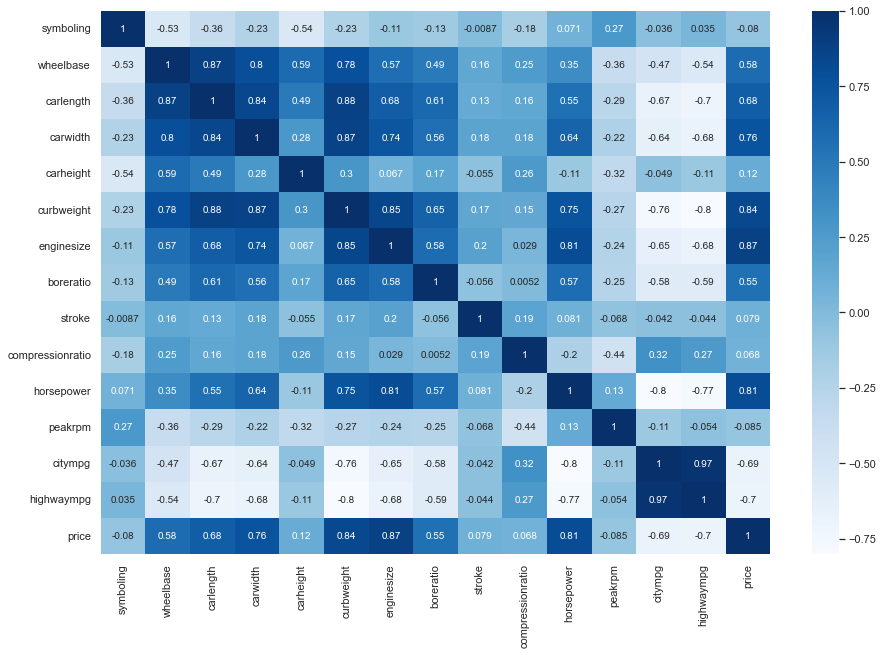

In [71]:
# droping columns we don't need
#del new_raw_data['car_ID']
del new_raw_data['CarName']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(15,10)})

n_variables = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

pc = new_raw_data[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")

In [72]:
new_raw_data.dtypes

car_ID                    int64
symboling                 int64
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight                int64
cylindernumber            int32
enginesize                int64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower                int64
peakrpm                   int64
citympg                   int64
highwaympg                int64
price                   float64
carbody_convertible       uint8
carbody_hardtop           uint8
carbody_hatchback         uint8
carbody_sedan             uint8
carbody_wagon             uint8
aspiration_std            uint8
aspiration_turbo          uint8
doornumber_four           uint8
doornumber_two            uint8
drivewheel_4wd            uint8
drivewheel_fwd            uint8
drivewheel_rwd            uint8
enginelocation_front      uint8
enginelocation_rear       uint8
fuelsyst

In [73]:
# Split the data into X & y

X = new_raw_data.drop(['price'], axis = 1).values
X_columns = new_raw_data.drop(['price'], axis = 1)
y = new_raw_data['price'].astype(int)

print(X.shape)
print(y.shape)

(205, 47)
(205,)


In [74]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [75]:
dt.feature_importances_

array([0.06709744, 0.00836196, 0.10628199, 0.05797326, 0.03906812,
       0.11069647, 0.24115026, 0.00178623, 0.05316757, 0.00496111,
       0.01631418, 0.00885142, 0.09456605, 0.01426826, 0.01443607,
       0.04866888, 0.        , 0.00567654, 0.01141783, 0.00129677,
       0.00965873, 0.00129677, 0.0122833 , 0.01790168, 0.00665545,
       0.        , 0.00968976, 0.00389031, 0.00389031, 0.        ,
       0.        , 0.00493398, 0.        , 0.00839299, 0.        ,
       0.003083  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00968976, 0.        , 0.        , 0.        ,
       0.        , 0.00259354])

In [76]:
#del final_fi

# Calculating FI
for i, column in enumerate(new_raw_data.drop('price', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature car_ID:, 0.067
Importance of feature symboling:, 0.008
Importance of feature wheelbase:, 0.106
Importance of feature carlength:, 0.058
Importance of feature carwidth:, 0.039
Importance of feature carheight:, 0.111
Importance of feature curbweight:, 0.241
Importance of feature cylindernumber:, 0.002
Importance of feature enginesize:, 0.053
Importance of feature boreratio:, 0.005
Importance of feature stroke:, 0.016
Importance of feature compressionratio:, 0.009
Importance of feature horsepower:, 0.095
Importance of feature peakrpm:, 0.014
Importance of feature citympg:, 0.014
Importance of feature highwaympg:, 0.049
Importance of feature carbody_convertible:, 0.000
Importance of feature carbody_hardtop:, 0.006
Importance of feature carbody_hatchback:, 0.011
Importance of feature carbody_sedan:, 0.001
Importance of feature carbody_wagon:, 0.010
Importance of feature aspiration_std:, 0.001
Importance of feature aspiration_turbo:, 0.012
Importance of feature doornumbe

,level_0,index,Variable,Feature Importance Score
0,0,6.0,curbweight,0.241150
1,53,NaN,curbweight,0.241150
2,1,5.0,carheight,0.110696
3,52,NaN,carheight,0.110696
4,2,2.0,wheelbase,0.106282
...,...,...,...,...
89,43,32.0,fuelsystem_4bbl,0.000000
90,34,44.0,enginetype_rotor,0.000000
91,33,45.0,fueltype_diesel,0.000000
92,32,39.0,enginetype_dohcv,0.000000


In [77]:
# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 47)
(41, 47)
(164,)
(41,)


In [79]:
# Training the Regression

lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)

In [83]:
y_train

49     36000
188     9995
142     7775
55     10945
166     9538
       ...  
128    37028
119     7957
133    12170
140     7603
200    16845
Name: price, Length: 164, dtype: int32

In [88]:
# Model Accuracy on training dataset

print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
print('The Accuracy r2  on the training dataset prediction is: ',r2_score(y_train,y_pred) ) 
print("")

# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test))
print("")
# The Root Mean Squared Error (RMSE)

print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))
print("")

# Coefficients
print('Coefficients: ', lm.coef_ )
print("")

# The Intercept
print('Intercept: ', lm.intercept_)

The Accuracy  on the training dataset is:  0.939012854622914
The Accuracy r2  on the training dataset prediction is:  0.939012854622914

The Accuracy  on the testing dataset is:  0.8508618050906

The RMSE  on the training dataset is:  1943.848395035627
The RMSE  on the testing dataset is:  3224.5179693899972

Coefficients:  [-1.53309499e+01  3.10151322e+02  5.98864078e+01 -2.93779170e+01
  5.46770707e+02  3.23313594e+02  5.31057960e+00 -1.43039529e+03
  1.76711113e+02 -8.12610784e+03 -5.48314526e+03 -7.86406633e+02
  1.35815983e+01  2.55446927e+00 -1.03377582e+01  2.12293090e+02
  3.08566895e+03 -1.97792999e+03  1.57227140e+02  1.36622407e+02
 -1.40158851e+03 -6.33439236e+02  6.33439236e+02  1.70495715e+02
 -1.70495715e+02 -7.21843059e+02 -8.91009633e+02  1.61285269e+03
 -4.22725069e+03  4.22725069e+03 -1.03956845e+03  7.52677402e+02
  6.50137888e+02  3.70909996e+03 -2.48809153e+03  1.31315797e+03
 -1.37635740e+03 -1.52105584e+03 -2.56656059e+03  3.60127325e+03
 -3.83628968e+03  9.7266

In [91]:
pd.DataFrame(y_pred)

,0
0,39258.792852
1,9526.672999
2,6532.094035
3,12151.479984
4,8508.412201
...,...
159,38044.178682
160,6233.432967
161,13149.748189
162,7758.416452
